## Bike Sharing Problem using Linear Regression

#### Importing all libraries

### Steps in the assignment :
`Step 1` : Understanding the data  
`Step 2` : EDA : Visualising the Data  
`Step 3` : Data Preparation  
`Step 4` : Model Building  
`Step 5` : Residual Analysis  
`Step 6` : Making Predictions    

In [7]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
import sklearn.metrics
%matplotlib inline

In [1]:
pip list

The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.
Package                            Version            
---------------------------------- -------------------
absl-py                            0.10.0             
aio-pika                           6.7.1              
aiofiles                           0.6.0              
aiohttp                            3.7.3              
aiormq                             3.3.1              
alabaster                          0.7.12             
alembic                            1.4.3              
anaconda-client                    1.7.2              
anaconda-navigator                 1.9.12             
anaconda-project                   0.8.3              
APScheduler                        3.6.3              
argh                               0.26.2             
asn1crypto                         1.3.0              
astroid                          

In [9]:
# Reading the base dataset
data = pd.read_csv('C:\iiitb\Week 7 - Linear Regression Assignment\day.csv')
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## Step 1 : Understanding the data 
 We will inspect the following
 1. Are there any null values in the dataset
 2. What are the relevant features in the dataset and drop the un-necessary ones
 3. Check the data type of each relevant column

In [10]:
# Checking the number or rows and columns in the dataset
data.shape

(730, 16)

#### Inference : 
The dataset contain 730 rows and 16 columns

In [11]:
# Checking for null values in the data
data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

#### Inference:
There are no null values in the dataset.

In [12]:
# Having a look at the dataset again and checking if the columns are relevant
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### Inference : 
    1. "instant" column : Since this is just a serial number column and doesn't add any meaning in the analysis, we can drop this.
    2. "dteday" column : Since all necessary information ( year, month, season, weekday, working day) has already been extracted from this column we can drop this column
    3. "cnt" column : This is our target variable ( y) . Since the total count of users is a sum of the registered users and the casual users, the latter two columns can be removed from the dataset

In [13]:
# Dropping the columns - dteday, casual and registered from the dataset
data = data.drop(['instant','dteday','casual','registered'],axis = 1)
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


Inference : We see that the extra columns have been removed.

## Step 2: EDA : Visualising the Data

We will try to visualise the data to understand the following:
    1. Presence of outliers in the data
    2. Correlation between the features
    3. Correlation between the features and the response variable ( 'cnt')

In [14]:
# Checking the number of unique counts in each of the categorical variables - Season, Year, Month, holiday, weekday,workingday,weathersit

print(data.season.value_counts())
print(data.yr.value_counts())
print(data.mnth.value_counts())
print(data.holiday.value_counts())
print(data.weekday.value_counts())
print(data.workingday.value_counts())
print(data.weathersit.value_counts())

3    188
2    184
1    180
4    178
Name: season, dtype: int64
1    365
0    365
Name: yr, dtype: int64
12    62
10    62
8     62
7     62
5     62
3     62
1     62
11    60
9     60
6     60
4     60
2     56
Name: mnth, dtype: int64
0    709
1     21
Name: holiday, dtype: int64
6    105
1    105
0    105
5    104
4    104
2    104
3    103
Name: weekday, dtype: int64
1    499
0    231
Name: workingday, dtype: int64
1    463
2    246
3     21
Name: weathersit, dtype: int64


#### Inference : 

There are no arbitrary values in all the categorical variables and the data is pretty clean. However, the non-binary categorical variables will need to have dummy encoding in them so that we can apply Linear Regression on them.

These variables that need to be converted to dummies are : Season, Month, Weekday, weathersit

#### Visualising Categorical Variables

As you might have noticed, there are a few categorical variables as well. Let's make a boxplot for some of these variables.

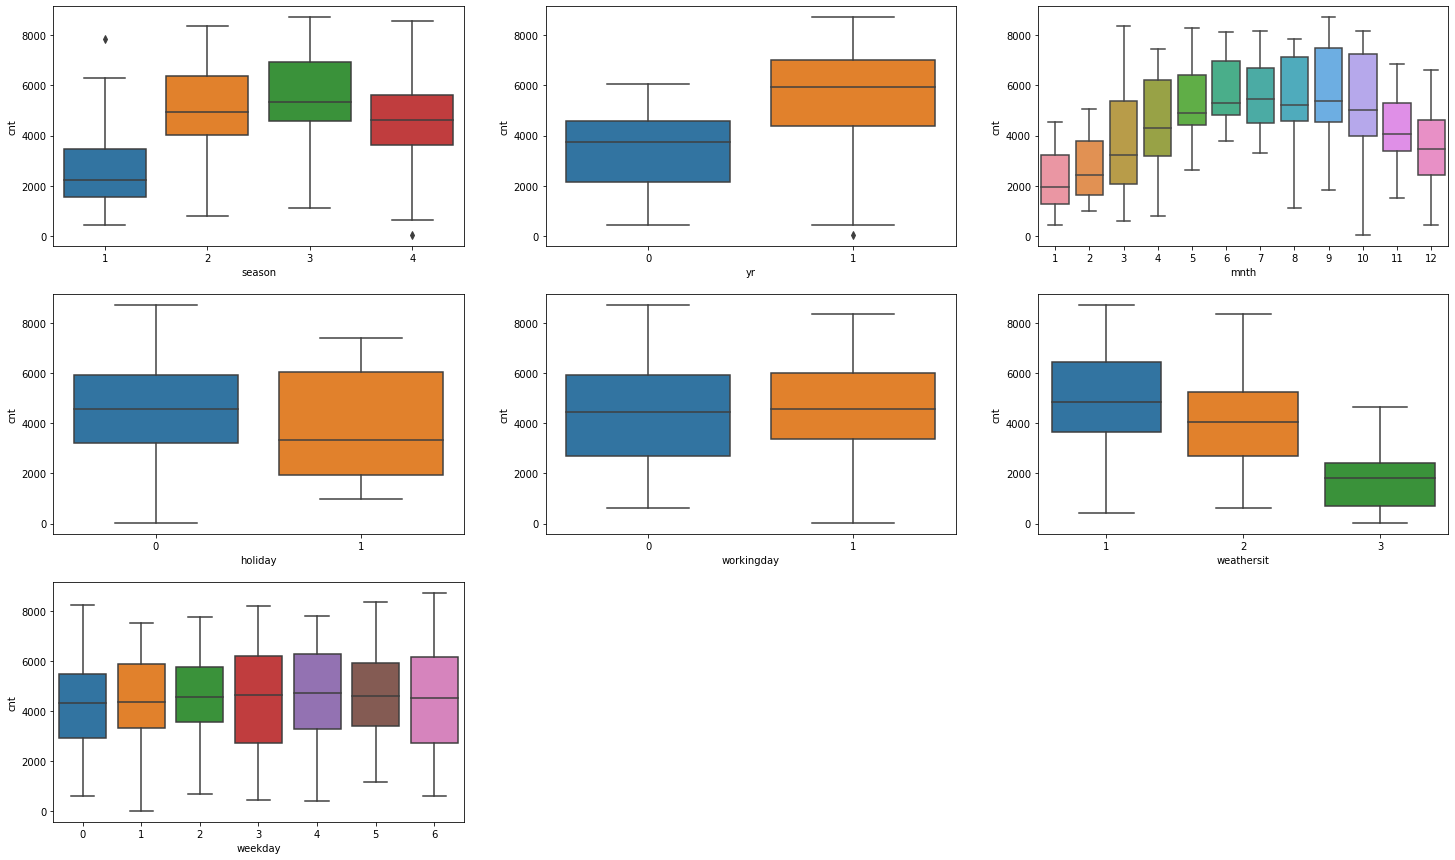

In [15]:
plt.figure(figsize=(25, 15))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = data)
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = data)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = data)
plt.subplot(3,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = data)
plt.subplot(3,3,5)
sns.boxplot(x = 'workingday', y = 'cnt', data = data)
plt.subplot(3,3,6)
sns.boxplot(x = 'weathersit', y = 'cnt', data = data)
plt.subplot(3,3,7)
sns.boxplot(x = 'weekday', y = 'cnt', data = data)
plt.show()

#### Inference :
    1. Season 3 ( Fall season) has more count and next is Season 2 ( Summer). Meaning people prefer renting bikes in fall and summer seasons compared to Spring and winter. The count is least in Spring season.
    2. More bikes were rented in 2019 that in 2018.
    3. Months - May to October has more bike rentals than the other months which also coincides with the point 1 made above.
    4. Being a holiday has less count of rental means and being a working day has a higher count. This suggests that many rentals are happening for office commute.
    5. It clearly shows that on a clear day the rentals are higher and on a snowy/rainy day the rentals are lower.
    6. There is not much difference in the rental count means on any day of teh week. However we do notice a higher range of rentals on a Friday and Monday.
    7. We don't see any outliers in the variables.
    

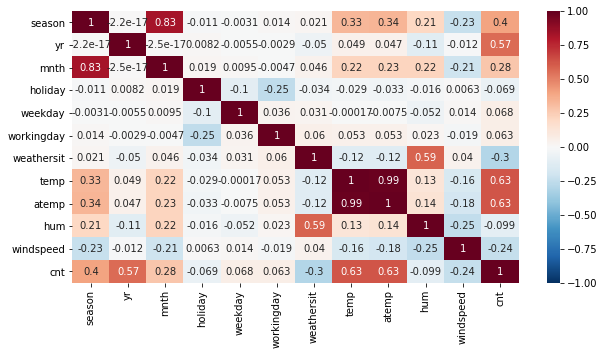

In [16]:
# Understanding the correlations between the categorical variables
plt.figure(figsize=(10,5))
sns.heatmap(data.corr(),annot = True, vmin = -1, linewidths = 0, cmap = "RdBu_r")
plt.show()

#### Inference :
We can see from the above Correlation map that the columns 'temp' and 'atemp' are highly correlated. 
So we will go ahead and drop 'atemp' column since the correlation with other columns for this variable is slightly higher.

Other correlated variables seem to be 
- Count and Yr ( 0.57)
- hum and weatherit (0.59)
- Season and mnth(0.83)
- Windspeed is negatively correlated to hum and temp


In [17]:
# Dropping the 'atemp' variables from our consideration
data = data.drop(['atemp'],axis = 1)
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600


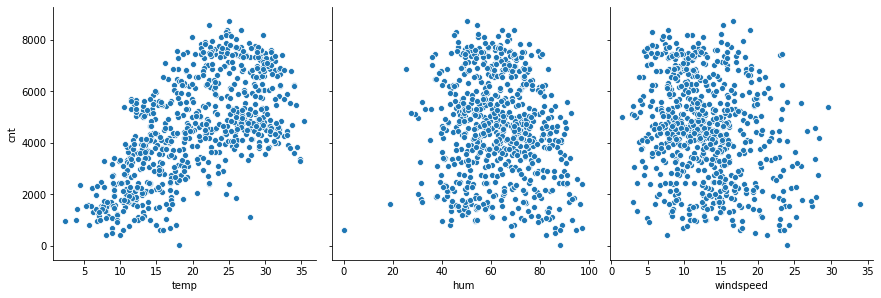

In [18]:
sns.pairplot(data, x_vars=['temp','hum','windspeed'], y_vars='cnt',size=4, aspect=1, kind='scatter')
plt.show()

#### Inference :
There seems to be a higher correlation between temp and cnct

## Step 3: Data Preparation

We will be doing the following :
    1. Convert the categorical variables into dummy variables. 
    2. Divide the dataset into test and train data
    3. Perform scaling of features if required
    4. Divide the data into X and Y

### Dummy Variables

The variable `season` has four levels. We need to convert these levels into integer as well. 

For this, we will use something called `dummy variables`.

In [19]:
# First we will label all the seasons appropriately using the dictionary that we have
conditions = [(data["season"]==1), (data["season"]==2), (data["season"]==3)]
seasons = ["spring", "summer", "fall"]
data["seasons"] = np.select(conditions, seasons, default="winter")
data["seasons"].value_counts()

fall      188
summer    184
spring    180
winter    178
Name: seasons, dtype: int64

In [20]:
# We will convert the seasons into dummy variables and drop the first one so that we have (n-1) dummy variables
season_data = pd.get_dummies(data['seasons'],drop_first = True)
data = pd.concat([data,season_data],axis = 1)
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,seasons,spring,summer,winter
0,1,0,1,0,6,0,2,14.110847,80.5833,10.749882,985,spring,1,0,0
1,1,0,1,0,0,0,2,14.902598,69.6087,16.652113,801,spring,1,0,0
2,1,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349,spring,1,0,0
3,1,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562,spring,1,0,0
4,1,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600,spring,1,0,0


In [21]:
# Dropping 'season' and 'seasons' columns from the dataset
data=data.drop(['season','seasons'],axis = 1)
data.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,spring,summer,winter
0,0,1,0,6,0,2,14.110847,80.5833,10.749882,985,1,0,0
1,0,1,0,0,0,2,14.902598,69.6087,16.652113,801,1,0,0
2,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349,1,0,0
3,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562,1,0,0
4,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600,1,0,0


The variable `month` has 12 levels. We need to convert these levels into integer as well. 

For this, we will use something called `dummy variables`.

In [22]:
# First we will label all the months appropriately using the dictionary that we have
conditions = [(data["mnth"]==1), (data["mnth"]==2),(data["mnth"]==3),(data["mnth"]==4),(data["mnth"]==5),(data["mnth"]==6),
             (data["mnth"]==7),(data["mnth"]==8),(data["mnth"]==9),(data["mnth"]==10),(data["mnth"]==11)]
vals = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov"]
data["months"] = np.select(conditions, vals, default="Dec")
data["months"].value_counts()

Dec    62
Jul    62
Oct    62
Jan    62
Mar    62
Aug    62
May    62
Nov    60
Sep    60
Jun    60
Apr    60
Feb    56
Name: months, dtype: int64

In [23]:
# We will convert the mnth column into dummy variables and drop the first one so that we have (n-1) dummy variables
month_data = pd.get_dummies(data['months'],drop_first = True)
data = pd.concat([data,month_data],axis = 1)

# Dropping 'mnth' and 'months' columns from the dataset
data=data.drop(['mnth','months'],axis = 1)
data.head()

,yr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,spring,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,6,0,2,14.110847,80.5833,10.749882,985,1,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,2,14.902598,69.6087,16.652113,801,1,...,0,0,1,0,0,0,0,0,0,0
2,0,0,1,1,1,8.050924,43.7273,16.636703,1349,1,...,0,0,1,0,0,0,0,0,0,0
3,0,0,2,1,1,8.200000,59.0435,10.739832,1562,1,...,0,0,1,0,0,0,0,0,0,0
4,0,0,3,1,1,9.305237,43.6957,12.522300,1600,1,...,0,0,1,0,0,0,0,0,0,0


The variable `weekday` has 7 levels. We need to convert these levels into integer as well. 

For this, we will use something called `dummy variables`.

In [24]:
# First we will label all the weekdays appropriately using the dictionary that we have
# We know from the data that weekday = 0 corresponds to Tuesday, so we will name everything accordingly 
conditions = [(data["weekday"]==0),(data["weekday"]==1), (data["weekday"]==2),(data["weekday"]==3),(data["weekday"]==4),
              (data["weekday"]==5)]
vals = ["Tue","Wed","Thu","Fri","Sat","Sun"]
data["weekday"] = np.select(conditions, vals, default="Mon")
data["weekday"].value_counts() 

Wed    105
Mon    105
Tue    105
Sat    104
Thu    104
Sun    104
Fri    103
Name: weekday, dtype: int64

In [25]:
# We will convert the weekday column into dummy variables and drop the first one so that we have (n-1) dummy variables
weekday_data = pd.get_dummies(data['weekday'],drop_first = True)
data = pd.concat([data,weekday_data],axis = 1)

# Dropping 'weekday' column from the dataset
data=data.drop(['weekday'],axis = 1)
data.head()

,yr,holiday,workingday,weathersit,temp,hum,windspeed,cnt,spring,summer,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
0,0,0,0,2,14.110847,80.5833,10.749882,985,1,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,2,14.902598,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,1,8.050924,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,1,1,8.200000,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,1,9.305237,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,0


The variable `weathersit` has four levels. We need to convert these levels into integer as well. 

For this, we will use something called `dummy variables`.

In [26]:
# First we will label all the weathersit appropriately using the dictionary that we have
conditions = [(data["weathersit"]==1),(data["weathersit"]==2), (data["weathersit"]==3)]
vals = ["Clear","Mist+Cloudy","Light_snow + Rain"]
data["weathersit"] = np.select(conditions, vals, default="Heavy_rain")
data["weathersit"].value_counts() 

Clear                463
Mist+Cloudy          246
Light_snow + Rain     21
Name: weathersit, dtype: int64

In [27]:
# We will convert the weathersit column into dummy variables and drop the first one so that we have (n-1) dummy variables
weather_data = pd.get_dummies(data['weathersit'],drop_first = True)
data = pd.concat([data,weather_data],axis = 1)

# Dropping 'weekday' column from the dataset
data=data.drop(['weathersit'],axis = 1)
data.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light_snow + Rain,Mist+Cloudy
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Inference : 
Here we can see that the fourth category : Heavy rain, doesn't exist in the data table itself. And hence when we conver to dummy variables we get only two additional columns added.

### Splitting the Data into Training and Testing Sets

In [28]:
# We will split the dataset into training and testing data based on a 70:30 split rule

from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(data, train_size = 0.7 , test_size = 0.3, random_state= 100)
print(df_train.shape)
print(df_test.shape)

(510, 29)
(219, 29)


In [29]:
# Let's have a good look at the training dataset
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light_snow + Rain,Mist+Cloudy
653,1,0,1,19.201653,55.8333,12.208807,7534,0,0,1,...,1,0,0,0,0,1,0,0,0,0
576,1,0,1,29.246653,70.4167,11.083475,7216,0,0,0,...,0,0,0,0,0,1,0,0,0,0
426,1,0,0,16.980847,62.1250,10.792293,4066,1,0,0,...,0,0,1,0,0,0,0,0,0,1
728,1,0,0,10.489153,48.3333,23.500518,1796,1,0,0,...,0,0,0,0,0,0,1,0,0,0
482,1,0,0,15.443347,48.9583,8.708325,4220,0,1,0,...,0,0,1,0,0,0,0,0,0,1


### Rescaling the Features 

We will use MinMax scaling.

In [30]:
# Let's understand the data ranges for each feature
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
yr,510.0,0.507843,0.500429,0.000000,0.000000,1.000000,1.000000,1.000000
holiday,510.0,0.025490,0.157763,0.000000,0.000000,0.000000,0.000000,1.000000
workingday,510.0,0.676471,0.468282,0.000000,0.000000,1.000000,1.000000,1.000000
temp,510.0,20.102429,7.431169,2.424346,13.606865,20.209597,26.615847,35.328347
hum,510.0,63.112926,14.156632,0.000000,52.270825,63.437500,73.250025,97.041700
windspeed,510.0,12.831318,5.291832,2.834381,9.041918,12.083182,15.750879,34.000021
cnt,510.0,4486.382353,1952.158739,22.000000,3120.000000,4530.000000,5973.500000,8714.000000
spring,510.0,0.243137,0.429398,0.000000,0.000000,0.000000,0.000000,1.000000
summer,510.0,0.245098,0.430568,0.000000,0.000000,0.000000,0.000000,1.000000
winter,510.0,0.249020,0.432870,0.000000,0.000000,0.000000,0.000000,1.000000


#### Inference :
We can see that there are 4 variables which have a range winder than the rest  : temp, hum, windspeed and cnt

In [31]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [32]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp', 'hum', 'windspeed', 'cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light_snow + Rain,Mist+Cloudy
653,1,0,1,0.509887,0.575354,0.300794,0.864243,0,0,1,...,1,0,0,0,0,1,0,0,0,0
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,1,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,...,0,0,1,0,0,0,0,0,0,1
728,1,0,0,0.245101,0.498067,0.663106,0.204096,1,0,0,...,0,0,0,0,0,0,1,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,...,0,0,1,0,0,0,0,0,0,1


In [33]:
# Again let's check the individual ranges
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
yr,510.0,0.507843,0.500429,0.0,0.000000,1.000000,1.000000,1.0
holiday,510.0,0.025490,0.157763,0.0,0.000000,0.000000,0.000000,1.0
workingday,510.0,0.676471,0.468282,0.0,0.000000,1.000000,1.000000,1.0
temp,510.0,0.537262,0.225844,0.0,0.339853,0.540519,0.735215,1.0
hum,510.0,0.650369,0.145882,0.0,0.538643,0.653714,0.754830,1.0
windspeed,510.0,0.320768,0.169797,0.0,0.199179,0.296763,0.414447,1.0
cnt,510.0,0.513620,0.224593,0.0,0.356420,0.518638,0.684710,1.0
spring,510.0,0.243137,0.429398,0.0,0.000000,0.000000,0.000000,1.0
summer,510.0,0.245098,0.430568,0.0,0.000000,0.000000,0.000000,1.0
winter,510.0,0.249020,0.432870,0.0,0.000000,0.000000,0.000000,1.0


### Dividing into X and y set for model building

In [34]:
df_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'spring', 'summer', 'winter', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun',
       'Mar', 'May', 'Nov', 'Oct', 'Sep', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue',
       'Wed', 'Light_snow + Rain', 'Mist+Cloudy'],
      dtype='object')

In [35]:
y_train = df_train.pop('cnt')
X_train = df_train

## Step 4 : Model Building

We will be doing the following :
    1. We will be using RFE to select the most important features from the entire dataset
    2. We will checks the VIF and p-values to determine if we should retain a feature or not
    3. We will do a check of residuals for the final model

### RFE

We will use Recursive Feature Elimination method to remove the unnecessary features. 

In [36]:
# Importing all the required libraries
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [37]:
# There are totally 28 variables. Let's run RFE to get the best 15 variables
lm = LinearRegression()
lm.fit(X_train,y_train)

rfe=RFE(lm,15)
rfe=rfe.fit(X_train,y_train)

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Aug', False, 7),
 ('Dec', False, 3),
 ('Feb', False, 4),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', False, 13),
 ('Mar', False, 14),
 ('May', False, 5),
 ('Nov', False, 2),
 ('Oct', False, 10),
 ('Sep', True, 1),
 ('Mon', True, 1),
 ('Sat', False, 12),
 ('Sun', False, 11),
 ('Thu', False, 9),
 ('Tue', False, 6),
 ('Wed', False, 8),
 ('Light_snow + Rain', True, 1),
 ('Mist+Cloudy', True, 1)]

In [38]:
# Printing out the columns that have been picked up by the RFE model
cols = X_train.columns[rfe.support_]
cols

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'Jan', 'Jul', 'Sep', 'Mon', 'Light_snow + Rain',
       'Mist+Cloudy'],
      dtype='object')

In [39]:
# Printing out the columns that have been eliminated up by the RFE model
X_train.columns[~rfe.support_]

Index(['Aug', 'Dec', 'Feb', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sat', 'Sun',
       'Thu', 'Tue', 'Wed'],
      dtype='object')

#### Inference :
We can see that few of the months and weekdays have been removed in the RFE Process

### Let's build the model using Backward elimination using statsmodel package

In [40]:
# Creating the X data set using the variables that were selected using the RFE process
X_train_rfe = X_train[cols]

In [41]:
# importing a constant variable
import statsmodels.api as sm
X_train_rfe = sm.add_constant(X_train_rfe)

In [42]:
# Running the linear model
lm = sm.OLS(y_train,X_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.6
Date:                Mon, 31 Aug 2020   Prob (F-statistic):          2.31e-191
Time:                        20:32:50   Log-Likelihood:                 519.88
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     494   BIC:                            -940.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2510      0.03

#### Inference :
- The F-statistics is high and significant which means that there is a relationship between the predicted variable and any one of the predictor variables
- The R- Squared is 84.9% and Adj.R-Squared is 84.4%
- There are few variables that are coming insignificant. We can evaluate the VIF of these and remove them one after the other.

In [43]:
# Let's calculate the VIF of the model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,84.59
7,spring,5.08
4,temp,3.89
9,winter,3.60
8,summer,2.64
5,hum,1.92
3,workingday,1.88
13,Mon,1.78
10,Jan,1.57
15,Mist+Cloudy,1.57


#### Inference :

From the two tables above we can see that 'spring' feature is having very high p- value (0.014 > 0.05) and also having a high VIF value ( 5.08). Certainly we should remove 'spring' from our variable list.

In [44]:
X_train_v1 = X_train_rfe.drop(['spring'],axis = 1)

In [45]:
# Let's re-run the OLS model
lm_1 = sm.OLS(y_train,X_train_v1).fit()
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     195.3
Date:                Mon, 31 Aug 2020   Prob (F-statistic):          3.24e-191
Time:                        20:32:50   Log-Likelihood:                 516.77
No. Observations:                 510   AIC:                            -1004.
Df Residuals:                     495   BIC:                            -940.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2003      0.03

#### Inference :
There is not much change in the R-Squared value compared to the first. Here 'Holiday' feature seems insignificant. Let's test the VIF for the same.

In [46]:
# Re-calculating VIF after removing the 'Spring' column

vif = pd.DataFrame()
X = X_train_v1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,57.07
4,temp,2.07
5,hum,1.90
3,workingday,1.88
12,Mon,1.78
14,Mist+Cloudy,1.56
9,Jan,1.55
8,winter,1.53
10,Jul,1.43
7,summer,1.41


#### Inference : 
VIF for all columns in good. Let's go ahead and omit the 'Holiday' variable and recheck

In [47]:
X_train_v2 = X_train_v1.drop(['holiday'],axis = 1)

In [48]:
# Let's re-run the OLS model
lm_2 = sm.OLS(y_train,X_train_v2).fit()
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     208.3
Date:                Mon, 31 Aug 2020   Prob (F-statistic):          2.53e-191
Time:                        20:32:51   Log-Likelihood:                 514.25
No. Observations:                 510   AIC:                            -1000.
Df Residuals:                     496   BIC:                            -941.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1899      0.03

#### Inference :
There is not much change in the R-Squared value compared to the first. Here 'Jan' feature seems insignificant. Let's test the VIF for the same.

In [49]:
# Re-calculating VIF after removing the 'holiday' column

vif = pd.DataFrame()
X = X_train_v2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,55.66
3,temp,2.06
4,hum,1.90
2,workingday,1.65
11,Mon,1.64
13,Mist+Cloudy,1.56
8,Jan,1.55
7,winter,1.53
9,Jul,1.43
6,summer,1.41


#### Inference : 
VIF for all columns in good. Let's go ahead and omit the 'Jan' variable and recheck

In [50]:
X_train_v3 = X_train_v2.drop(['Jan'],axis = 1)

In [51]:
# Let's re-run the OLS model
lm_3 = sm.OLS(y_train,X_train_v3).fit()
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     223.3
Date:                Mon, 31 Aug 2020   Prob (F-statistic):          2.26e-191
Time:                        20:32:51   Log-Likelihood:                 511.55
No. Observations:                 510   AIC:                            -997.1
Df Residuals:                     497   BIC:                            -942.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1705      0.02

#### Inference :
The R2 and adj. R2 has not changed much. 'Jul' variable is insignificant due to high p-value. Let's remove the same and re-run.

In [52]:
X_train_v4 = X_train_v3.drop(['Jul'],axis = 1)

In [53]:
# Let's re-run the OLS model
lm_4 = sm.OLS(y_train,X_train_v4).fit()
print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     240.6
Date:                Mon, 31 Aug 2020   Prob (F-statistic):          2.89e-191
Time:                        20:32:51   Log-Likelihood:                 508.45
No. Observations:                 510   AIC:                            -992.9
Df Residuals:                     498   BIC:                            -942.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1698      0.02

#### Inference :
- Here we can see a good R2 and Adj. R2 value.
- Also all the p- values and < 0.05. So all the variables in this model are significant
- The Rental counts are inversely proportional to the Humidity and the Windspeed. Also, compared to clear weather, Light snow or rain and misty weather negatively affect the count of the rentals.
- The Durbin-Watson metric is between the ideal range of 0-4 which suggests no ACF in the residuals

## Step 5 : Residual Analysis

We will be doing the following :
    1. Creating a distribution plot of the residuals to check for normality
    2. Create a scatter plot with y-predicted to check if there are any correlations

In [54]:
# Let's first predict in the Training Set
y_train_pred = lm_4.predict(X_train_v4)

Text(0.5, 0, 'Errors')

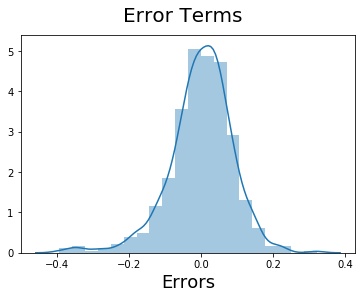

In [55]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

#### Inference :
We can very well see that the residuals are normally distributed with mean zero.

Let's check for any patterns in the residuals

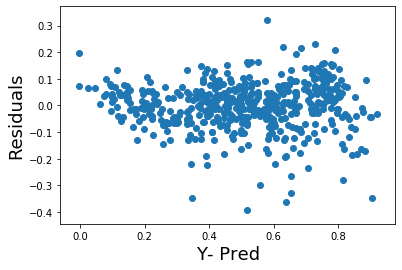

In [56]:
plt.scatter (y_train_pred,(y_train - y_train_pred))
plt.xlabel('Y- Pred', fontsize = 18) 
plt.ylabel('Residuals', fontsize = 18) 
plt.show()

#### Inference :
We can see that the residuals are randomly spready across the plot with no specific relation with the Y-Pred value on the X-axis.

Hence this proves that:
- The residuals are homoskedastic
- The residuals are not correlated with the predicted values

## Step 6 : Making Predictions

Applying the scaling on the test set

In [57]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp', 'hum', 'windspeed', 'cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light_snow + Rain,Mist+Cloudy
184,0,1,0,0.831783,0.657364,0.084219,0.692706,0,0,0,...,0,0,0,0,0,0,0,1,0,1
535,1,0,1,0.901354,0.610133,0.153728,0.712034,0,1,0,...,0,0,0,0,0,0,0,0,0,0
299,0,0,1,0.511964,0.837699,0.334206,0.303382,0,0,1,...,1,0,0,1,0,0,0,0,0,1
221,0,0,1,0.881625,0.437098,0.339570,0.547400,0,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,1,0.817246,0.314298,0.537414,0.569029,0,1,0,...,0,0,0,1,0,0,0,0,0,0


Divinding into X_test and y_test columns

In [58]:
y_test = df_test.pop('cnt')
X_test = df_test

In [59]:
# Adding Constant to the X columns
X_test_new = sm.add_constant(X_test)

In [60]:
# Let's pick the columns that were part of the fourth model 
X_test_new = X_test_new[X_train_v4.columns]

In [61]:
# Prediction in the Test set
y_test_pred = lm_4.predict(X_test_new)

### Model Evaluation

Text(0, 0.5, 'y_pred')

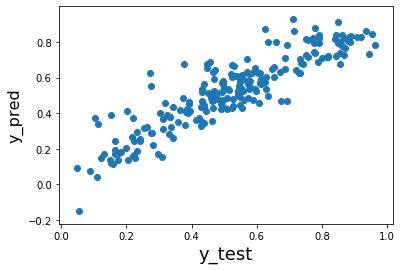

In [62]:
# Plotting the predicted Y Vs Actual Y in Training data
plt.scatter(y_test,y_test_pred)
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [63]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

##### Looking at the RMSE

In [64]:
#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test, y_test_pred))

0.09601879791414207

###### Checking the R-squared on the test set

In [65]:
r_squared = r2_score(y_test, y_test_pred)
r_squared

0.805885826309035

#### Inference :
The R-Squared of the test set is slightly lower than the training set ( by 4% ) but still the model is able to explain a good amount of variance of Y in the test set.